In [1]:
import mlc_func as mlcf
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
elfs = {}

In [33]:
for direction in ['000','100', '010','001']:
    elfs[direction] = mlcf.elf.utils.change_alignment(\
                        '../data/revPBE/dz_custom/basis_nocore_nn.json_processed/{}_processed.hdf5'.format(direction),
                        '../data/revPBE/dz_custom/000.traj'.format(direction),
                                                      'nn',
                          '../data/revPBE/dz_custom/basis_nocore_nn_fd.json_processed/{}_processed.hdf5'.format(direction))

{'r_o_o': 1.0, 'r_i_o': 0.0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'nn'}
{'r_o_o': 1.0, 'r_i_o': 0.0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'nn'}
{'r_o_o': 1.0, 'r_i_o': 0.0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'nn'}
{'r_o_o': 1.0, 'r_i_o': 0.0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'nn'}


In [34]:
for direction in ['000','100', '010','001']:
    elfs[direction] = mlcf.elf.utils.hdf5_to_elfs_fast(\
                        '../data/revPBE/dz_custom/basis_nocore_nn_fd.json_processed/{}_processed.hdf5'.format(direction),
                                                 species_filter = 'o')[0]['o']

{'r_o_o': 1.0, 'r_i_o': 0.0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'nn'}
{'r_o_o': 1.0, 'r_i_o': 0.0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'nn'}
{'r_o_o': 1.0, 'r_i_o': 0.0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'nn'}
{'r_o_o': 1.0, 'r_i_o': 0.0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_o': 2, 'n_rad_h': 2, 'n_l_o': 3, 'n_l_h': 2, 'gamma_o': 0, 'gamma_h': 0, 'alignment': 'nn'}


In [35]:
D = np.concatenate([elfs[idx] - elfs['000'] for idx in ['100','010','001']], axis = 1)

In [36]:
D.shape

(400, 3, 18)

In [37]:
from ase.io import read, write

In [38]:
atoms = read('../data/revPBE/dz_custom/000.traj', ':')

In [39]:
for i, (atom, d) in enumerate(zip(atoms, D)):
    angles = mlcf.elf.geom.get_nncs_angles(0,atom.get_positions())
    for j, _ in enumerate(d.T):
        D[i,:,j] = mlcf.elf.geom.rotate_vector(D[i:i+1,:,j], angles, inverse = True)
        
    

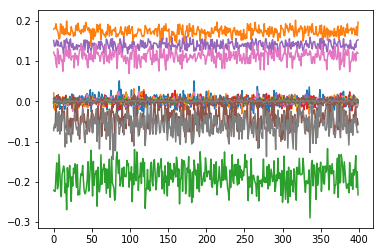

In [42]:
plot(D[:,2]);

In [52]:
np.mean(D[:,0], axis = 0)

array([ 2.86780824e-01, -1.52015792e-01, -4.05566176e-04,  4.30747182e-01,
       -1.56289053e-02, -9.87987899e-05, -2.16794850e-01, -2.98267619e-04,
        5.98806234e-01,  3.83638518e-02,  1.74561606e-02,  3.41866811e-04,
        4.24168742e-02,  8.53396502e-02, -9.82057716e-05, -9.65788876e-03,
       -3.53885267e-04, -5.41560866e-02])

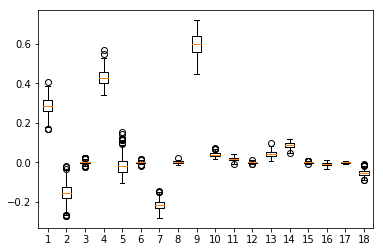

In [54]:
boxplot(D[:,0]);

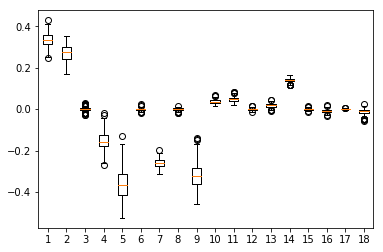

In [55]:
boxplot(D[:,1]);

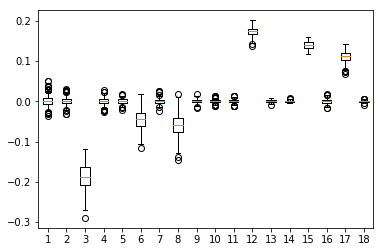

In [56]:
boxplot(D[:,2]);